In [1]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np

In [2]:
iris = load_iris()
X= iris.data[:, :2]
y = (iris.target != 0)*1
YYY = np.reshape(y, (-1,1))

In [3]:
#Standardize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0, ddof=1)
std_X = (X-mean)/std

#Adding Bias on X
XTrain=[]
for i in std_X:
    XTrain.append([1,i[0],i[1]])
XTrain = np.array(XTrain)

In [4]:
theta = np.random.rand(3,1)*2-1

In [5]:
learning_rate = 0.01

In [6]:
YYY = np.reshape(y, (-1,1))

In [7]:
def probability(theta, X):
    return 1 / (1 + np.exp(-(np.dot(X, theta))))

In [8]:
def LogisticRegression(theta, learning_rate):
    iterations = 10000
    loss= 0
    old_loss = 100
    for iteration in range(iterations):
        gradients = probability(theta, XTrain)
        theta = theta + (learning_rate/150) * np.dot(XTrain.T,(YYY-gradients))
        loss = np.dot(-y,(np.log(probability(theta, XTrain))))-np.dot((1-y),np.log(1-probability(theta, XTrain)))

        if abs(old_loss-loss) < 2**-23 :
            break
        old_loss = loss
        
        
        
        
    from matplotlib import pyplot as plt 

    fig = plt.figure()        
        
    a = XTrain[:,1]
    b = XTrain[:,2]
    
    features = iris.data.T
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1]);
    
    plt.scatter(a,b,c=y,cmap='bwr')
    
    xx = range(-2,3)
    yy = [(theta[1]/-theta[2])*(x) +(theta[0]/-theta[2]) for x in xx]
    plt.plot(xx, yy, 'g', label='plots of my method')
        

    print("theta: ", theta)
    print("gradients shape: ", np.shape(gradients))
    print("YYY shape: ", np.shape(YYY))
    print("Loss:", loss)
    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(XTrain, y)
    
  
    xxx = range(-2,3)
    yyy  = -(model.intercept_ + model.coef_[0][1]*xxx)/model.coef_[0][2]


    
    plt.plot(xxx,yyy, 'y', label='plots of the built in LogisticRegression method')
    
    plt.legend(loc='upper left')
    plt.show()
        


theta:  [[ 2.14291716]
 [ 3.77463249]
 [-2.55977418]]
gradients shape:  (150, 1)
YYY shape:  (150, 1)
Loss: [6.96100227]


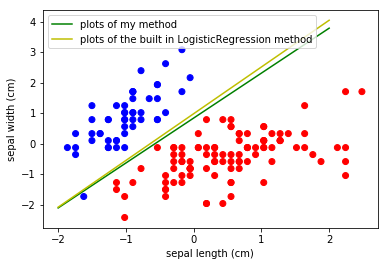

In [9]:
LogisticRegression(theta, learning_rate) 

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(XTrain, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
print(model.score(XTrain, y))

0.9933333333333333


In [12]:
print(model.coef_)

[[-1.39059590e-05  3.27339361e+00 -2.13479332e+00]]


In [13]:
print(model.intercept_)

[2.09163637]
